# 1. 데이터

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

# 필요한 패키지/모듈 가져오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from factor_analyzer import FactorAnalyzer

In [ ]:
data_2201 = pd.read_csv('/content/drive/MyDrive/datamining/data/LOCAL_PEOPLE_DONG_202201.csv', index_col = False)
data_2202 = pd.read_csv('/content/drive/MyDrive/datamining/data/LOCAL_PEOPLE_DONG_202202.csv', index_col = False)
data_2203 = pd.read_csv('/content/drive/MyDrive/datamining/data/LOCAL_PEOPLE_DONG_202203.csv', index_col = False)
data_2204 = pd.read_csv('/content/drive/MyDrive/datamining/data/LOCAL_PEOPLE_DONG_202204.csv', index_col = False)
data_2205 = pd.read_csv('/content/drive/MyDrive/datamining/data/LOCAL_PEOPLE_DONG_202205.csv', index_col = False)
data_2206 = pd.read_csv('/content/drive/MyDrive/datamining/data/LOCAL_PEOPLE_DONG_202206.csv', index_col = False)
data_2207 = pd.read_csv('/content/drive/MyDrive/datamining/data/LOCAL_PEOPLE_DONG_202207.csv', index_col = False)
data_2208 = pd.read_csv('/content/drive/MyDrive/datamining/data/LOCAL_PEOPLE_DONG_202208.csv', index_col = False)
data_2209 = pd.read_csv('/content/drive/MyDrive/datamining/data/LOCAL_PEOPLE_DONG_202209.csv', index_col = False)
data_2210 = pd.read_csv('/content/drive/MyDrive/datamining/data/LOCAL_PEOPLE_DONG_202210.csv', index_col = False)
data_2211 = pd.read_csv('/content/drive/MyDrive/datamining/data/LOCAL_PEOPLE_DONG_202211.csv', index_col = False)
data_2212 = pd.read_csv('/content/drive/MyDrive/datamining/data/LOCAL_PEOPLE_DONG_202212.csv', index_col = False)
# 1시간 단위 행정동 별 생활인구 1년치 데이터

In [ ]:
data_list = [data_2201,data_2202,data_2203,data_2204,data_2205,data_2206,data_2207,data_2208,data_2209,data_2210,data_2211,data_2212]

In [ ]:
#여러개의 데이터프레임 하나로 합치기기
data_22 = pd.concat(data_list, axis = 0)
data_22.reset_index(inplace = True , drop = True)

data_22 = pd.DataFrame(data_22)

In [ ]:
data_22

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20220101,0,11200550,15915.9153,255.4393,116.4503,356.6989,1515.4383,1407.4535,639.5899,...,1138.1167,506.7359,572.9357,342.8503,546.2349,393.6438,400.2660,414.5880,299.1094,871.5197
1,20220101,0,11320515,20067.0536,761.0144,364.8200,549.2125,597.7672,650.3921,666.1416,...,761.3329,684.2883,771.4230,752.9131,820.4530,782.0723,951.6618,914.5524,636.0850,1497.8745
2,20220101,0,11740590,13131.7376,814.6533,380.7626,444.0055,297.3462,341.0619,296.3934,...,314.2245,357.4321,615.6579,598.9586,610.3032,533.1886,436.0663,463.4412,284.7736,714.1822
3,20220101,0,11710642,27802.6396,536.2982,235.3147,509.3444,1001.5843,1363.8527,1721.8997,...,1475.7207,1726.6845,1671.2855,1286.8066,1070.2619,832.3977,783.1949,810.2889,549.8354,1327.1990
4,20220101,0,11470580,14398.2868,573.7967,294.0708,353.9354,357.5041,483.9943,525.4139,...,567.7996,458.1889,529.2853,502.2692,544.1017,485.4408,654.0012,600.3047,431.7909,1005.2701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3714235,20221231,23,11740550,26849.5654,2351.0068,1214.8337,937.6079,456.3894,498.5714,472.1622,...,513.0224,561.7293,1099.6503,1217.8158,1274.9191,851.5014,816.0413,778.8732,640.6550,1236.6337
3714236,20221231,23,11590540,20025.0040,1031.9551,378.5519,384.2442,613.5671,790.2585,713.5261,...,746.3391,713.8543,1026.2784,819.3403,749.9114,689.6776,820.0387,676.9692,602.1882,1293.3497
3714237,20221231,23,11470630,16125.0930,526.2720,583.5859,839.0280,368.6007,365.4509,305.8051,...,359.1490,348.7186,485.3043,775.2054,876.9643,721.4776,639.9144,509.0424,404.5792,937.8374
3714238,20221231,23,11710540,14964.0371,658.0712,375.2026,330.4875,294.3431,351.6816,401.5746,...,372.0913,415.5257,593.9416,580.5089,608.0485,651.5841,633.4928,609.3532,509.4529,1173.0780


In [ ]:
data_22_gr = data_22[data_22['행정동코드']==11305545]
# 개별 행정동 데이터 추출, 송중동

In [ ]:
data_22_gr = data_22_gr[['기준일ID', '시간대구분', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수', '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자70세이상생활인구수']]

data_22_gr['60세이상생활인구수'] = data_22_gr['남자70세이상생활인구수'] + data_22_gr['여자60세부터64세생활인구수']+ data_22_gr['여자65세부터69세생활인구수']+ data_22_gr['남자60세부터64세생활인구수']+ data_22_gr['남자65세부터69세생활인구수']+ data_22_gr['여자70세이상생활인구수']


<ipython-input-371-485b84423860>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_22_gr['60세이상생활인구수'] = data_22_gr['남자70세이상생활인구수'] + data_22_gr['여자60세부터64세생활인구수']+ data_22_gr['여자65세부터69세생활인구수']+ data_22_gr['남자60세부터64세생활인구수']+ data_22_gr['남자65세부터69세생활인구수']+ data_22_gr['여자70세이상생활인구수']


In [ ]:
data_22_gr['60세이상생활인구수'] = data_22_gr['남자70세이상생활인구수'] + data_22_gr['여자60세부터64세생활인구수']+ data_22_gr['여자65세부터69세생활인구수']+ data_22_gr['남자60세부터64세생활인구수']+ data_22_gr['남자65세부터69세생활인구수']+ data_22_gr['여자70세이상생활인구수']

columns_to_drop = ['여자60세부터64세생활인구수','여자65세부터69세생활인구수','남자60세부터64세생활인구수','남자65세부터69세생활인구수','남자70세이상생활인구수','여자70세이상생활인구수']

In [ ]:
data_22_gr

,기준일ID,시간대구분,여자60세부터64세생활인구수,여자65세부터69세생활인구수,남자60세부터64세생활인구수,남자65세부터69세생활인구수,남자70세이상생활인구수,여자70세이상생활인구수,60세이상생활인구수
260,20220101,0,1377.2938,1137.8150,1132.2391,889.9959,2030.9870,3267.7697,9836.1005
491,20220101,1,1373.6920,1120.3144,1163.9959,900.7981,2047.6025,3247.5000,9853.9029
1121,20220101,2,1379.0965,1126.1792,1146.9568,877.4855,2000.9957,3245.3006,9776.0143
1667,20220101,3,1373.5944,1135.3401,1153.8694,882.4243,2009.8907,3217.2452,9772.3641
2085,20220101,4,1371.6546,1147.0565,1146.3987,855.2005,2020.1463,3244.8394,9785.2960
...,...,...,...,...,...,...,...,...,...
3712166,20221231,19,1585.1622,1212.5225,1248.8785,1047.3479,2087.5306,3207.9813,10389.4230
3712633,20221231,20,1579.8791,1202.0049,1222.7566,1018.9341,2076.0306,3233.6536,10333.2589
3712995,20221231,21,1569.3687,1175.0409,1228.3221,1024.1289,2090.2547,3218.0056,10305.1209
3713473,20221231,22,1492.0525,1224.1036,1257.7780,987.7772,2094.2810,3269.1508,10325.1431


In [ ]:
data_22_gr_ = data_22_gr
data_22_gr_

,기준일ID,시간대구분,여자60세부터64세생활인구수,여자65세부터69세생활인구수,남자60세부터64세생활인구수,남자65세부터69세생활인구수,남자70세이상생활인구수,여자70세이상생활인구수,60세이상생활인구수
260,20220101,0,1377.2938,1137.8150,1132.2391,889.9959,2030.9870,3267.7697,9836.1005
491,20220101,1,1373.6920,1120.3144,1163.9959,900.7981,2047.6025,3247.5000,9853.9029
1121,20220101,2,1379.0965,1126.1792,1146.9568,877.4855,2000.9957,3245.3006,9776.0143
1667,20220101,3,1373.5944,1135.3401,1153.8694,882.4243,2009.8907,3217.2452,9772.3641
2085,20220101,4,1371.6546,1147.0565,1146.3987,855.2005,2020.1463,3244.8394,9785.2960
...,...,...,...,...,...,...,...,...,...
3712166,20221231,19,1585.1622,1212.5225,1248.8785,1047.3479,2087.5306,3207.9813,10389.4230
3712633,20221231,20,1579.8791,1202.0049,1222.7566,1018.9341,2076.0306,3233.6536,10333.2589
3712995,20221231,21,1569.3687,1175.0409,1228.3221,1024.1289,2090.2547,3218.0056,10305.1209
3713473,20221231,22,1492.0525,1224.1036,1257.7780,987.7772,2094.2810,3269.1508,10325.1431


In [ ]:
data_22_gr_a = data_22_gr

In [ ]:
data_22_gr_a

,기준일ID,시간대구분,여자60세부터64세생활인구수,여자65세부터69세생활인구수,남자60세부터64세생활인구수,남자65세부터69세생활인구수,남자70세이상생활인구수,여자70세이상생활인구수,60세이상생활인구수
260,20220101,0,1377.2938,1137.8150,1132.2391,889.9959,2030.9870,3267.7697,9836.1005
491,20220101,1,1373.6920,1120.3144,1163.9959,900.7981,2047.6025,3247.5000,9853.9029
1121,20220101,2,1379.0965,1126.1792,1146.9568,877.4855,2000.9957,3245.3006,9776.0143
1667,20220101,3,1373.5944,1135.3401,1153.8694,882.4243,2009.8907,3217.2452,9772.3641
2085,20220101,4,1371.6546,1147.0565,1146.3987,855.2005,2020.1463,3244.8394,9785.2960
...,...,...,...,...,...,...,...,...,...
3712166,20221231,19,1585.1622,1212.5225,1248.8785,1047.3479,2087.5306,3207.9813,10389.4230
3712633,20221231,20,1579.8791,1202.0049,1222.7566,1018.9341,2076.0306,3233.6536,10333.2589
3712995,20221231,21,1569.3687,1175.0409,1228.3221,1024.1289,2090.2547,3218.0056,10305.1209
3713473,20221231,22,1492.0525,1224.1036,1257.7780,987.7772,2094.2810,3269.1508,10325.1431


In [ ]:
data_22_gr = pd.DataFrame(data_22_gr)

# 기준일ID와 시간대구분을 기준으로 피벗 테이블 생성
pivot_22_gr = data_22_gr.pivot(index='기준일ID', columns='시간대구분', values='60세이상생활인구수')

In [ ]:
pivot_22_gr

시간대구분,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
기준일ID,,,,,,,,,,,,,,,,,,,,,
20220101,9836.1005,9853.9029,9776.0143,9772.3641,9785.2960,9767.6555,9771.3797,9648.9758,9489.6514,9518.7710,...,9511.7984,9615.6151,9580.4584,9639.5113,9709.2113,9812.0776,9811.0852,9921.1454,10340.6266,9809.6969
20220102,9723.9198,9817.6070,9772.7739,9717.0207,9709.8148,9670.9383,9603.9395,9612.5466,9437.6318,9361.7032,...,9663.3471,9856.6118,9921.4764,10076.5158,9871.4744,10075.6030,10064.1636,10138.8332,10155.6523,9892.1905
20220103,9884.1958,9879.9528,9832.4616,9829.0986,9732.3961,9605.2999,9376.0242,9120.6724,8970.6096,8774.0199,...,9541.2810,9779.2407,9833.8936,10022.7287,10120.0009,10192.1746,10066.1346,10156.6120,10263.1059,9720.0527
20220104,9771.3992,9849.7350,9807.9098,9721.0977,9593.0121,9472.4063,9198.7255,8941.2202,8817.2708,8701.4915,...,9347.4633,9321.5823,9642.6727,9600.9168,9860.9897,10124.9254,10052.2894,10026.6189,10113.9789,9691.6898
20220105,9698.5733,9732.0307,9747.0069,9638.1277,9585.6036,9350.0272,9142.5348,8864.5221,8748.9617,8631.0033,...,9286.3116,9583.8766,9782.6640,9932.1414,9951.1870,10076.0795,10199.0127,10258.5383,10268.8943,9657.3004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221227,9496.2497,9643.9053,9799.8200,9742.5193,9702.6913,9511.8176,9208.5101,9138.8927,8920.6509,9001.6506,...,9164.4824,9515.9095,9920.2006,9938.6525,10011.8476,10286.4119,10211.0063,10256.1055,10237.8909,9650.0233
20221228,9568.3770,9815.5305,9790.9739,9823.6861,9687.1415,9472.2819,9181.2528,9155.8205,9230.8153,9116.1368,...,9501.0138,9784.9868,9783.4597,9906.0249,10257.8903,10340.6144,10331.0972,10377.2883,10385.7167,9733.0607
20221229,9627.2424,9724.5107,9754.3212,9812.9651,9728.2750,9560.6278,9396.9547,9395.1924,9182.4126,9133.4721,...,9284.1173,9568.3413,9714.9777,9833.5723,10006.5913,10095.6039,10109.6405,10186.8259,10209.1412,9631.6736


# 2. FA

##Step1. 데이터 전처리

In [ ]:
# 열별로 scaling (z-standardization)
from sklearn.preprocessing import StandardScaler
data_scale = pd.DataFrame(StandardScaler().fit_transform(pivot_22_gr), columns=pivot_22_gr.columns, index = pivot_22_gr.index)

In [ ]:
data_scale

시간대구분,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
기준일ID,,,,,,,,,,,,,,,,,,,,,
20220101,1.438190,1.258297,1.007410,1.134112,1.451861,1.907184,2.330465,2.211593,2.025675,2.308955,...,1.275975,1.045841,0.255151,-0.038666,-0.476758,-0.480678,-0.586730,-0.380505,1.164109,1.334366
20220102,0.962395,1.110758,0.993876,0.903138,1.150245,1.553077,1.788941,2.098738,1.863987,1.824961,...,1.741622,1.815730,1.405943,1.547948,0.141312,0.572110,0.474717,0.569054,0.344699,1.691051
20220103,1.642178,1.364187,1.243166,1.370891,1.240478,1.312757,1.051832,0.574946,0.412384,0.014050,...,1.366563,1.568560,1.110388,1.352665,1.087964,1.037815,0.482983,0.646606,0.820703,0.946764
20220104,1.163771,1.241355,1.140624,0.920153,0.683513,0.826199,0.478423,0.019016,-0.064225,-0.209441,...,0.771040,0.106524,0.465098,-0.178789,0.101375,0.769153,0.424915,0.079573,0.160092,0.824129
20220105,0.854892,0.762899,0.886259,0.573881,0.653909,0.378137,0.296695,-0.218590,-0.276544,-0.426647,...,0.583146,0.944450,0.937509,1.023774,0.444942,0.574013,1.040293,1.091210,0.846345,0.675436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221227,-0.003228,0.404679,1.106836,1.009556,1.121781,0.970494,0.510068,0.631391,0.257102,0.715480,...,0.208815,0.727322,1.401638,1.047413,0.676002,1.414294,1.090596,1.080598,0.709004,0.643971
20221228,0.302687,1.102317,1.069890,1.348303,1.059645,0.825744,0.421914,0.683832,1.221158,1.068263,...,1.242838,1.586916,0.940195,0.928954,1.613194,1.630834,1.594274,1.609200,1.363851,1.003007
20221229,0.552355,0.732331,0.916807,1.303559,1.224011,1.149201,1.119524,1.425390,1.070712,1.121680,...,0.576404,0.894821,0.709097,0.665903,0.655980,0.652014,0.665453,0.778399,0.581647,0.564631


In [ ]:
#z-표준화한 결과의 평균
data_scale.mean(axis=0).head()

시간대구분
0    3.038848e-14
1    2.458186e-14
2   -2.701522e-14
3   -3.233334e-15
4   -1.367430e-14
dtype: float64

In [ ]:
data_scale.cov() # 공분산행렬 구하기

시간대구분,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
시간대구분,,,,,,,,,,,,,,,,,,,,,
0,1.002747,0.859402,0.842280,0.800968,0.822318,0.789620,0.717255,0.664646,0.661323,0.648907,...,0.676847,0.705952,0.736714,0.740556,0.723666,0.724621,0.720057,0.730880,0.779784,0.869624
1,0.859402,1.002747,0.974120,0.951310,0.929001,0.875046,0.787476,0.742819,0.713001,0.672003,...,0.631467,0.665033,0.667946,0.689984,0.678123,0.698191,0.679384,0.688894,0.711775,0.767092
2,0.842280,0.974120,1.002747,0.973132,0.948395,0.885260,0.787973,0.739920,0.708324,0.668505,...,0.634316,0.668004,0.675067,0.689496,0.677869,0.694247,0.681690,0.698502,0.720358,0.756687
3,0.800968,0.951310,0.973132,1.002747,0.968862,0.914885,0.824375,0.787372,0.753698,0.709893,...,0.631100,0.661295,0.652157,0.681405,0.670904,0.680106,0.667404,0.677872,0.684932,0.715650
4,0.822318,0.929001,0.948395,0.968862,1.002747,0.960106,0.887979,0.851997,0.823291,0.778860,...,0.682587,0.700894,0.680913,0.708024,0.684099,0.676592,0.656820,0.675607,0.689099,0.764094
5,0.789620,0.875046,0.885260,0.914885,0.960106,1.002747,0.952332,0.918854,0.897513,0.846668,...,0.733649,0.709710,0.679784,0.700648,0.666506,0.644526,0.632021,0.635469,0.643864,0.763322
6,0.717255,0.787476,0.787973,0.824375,0.887979,0.952332,1.002747,0.964845,0.940578,0.882035,...,0.739393,0.683252,0.633805,0.662967,0.613760,0.581254,0.580915,0.569195,0.568128,0.728865
7,0.664646,0.742819,0.739920,0.787372,0.851997,0.918854,0.964845,1.002747,0.959389,0.906367,...,0.731910,0.663471,0.624555,0.648160,0.596462,0.562570,0.554153,0.544528,0.534800,0.686028
8,0.661323,0.713001,0.708324,0.753698,0.823291,0.897513,0.940578,0.959389,1.002747,0.935850,...,0.764804,0.693427,0.633949,0.655055,0.600008,0.552905,0.539728,0.528161,0.518819,0.675249


##Step2. 요인 분석 전 검정 

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(data_scale)
kmo_model # 0.8 이상이므로 꽤 좋음

/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.9642939289034943

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(data_scale)
chi_square_value, p_value # p-value < 0.05 --> 귀무가설 기각

(17951.871596723322, 0.0)

In [ ]:
# Eigen value
fa = FactorAnalyzer(n_factors=data_scale.shape[1], rotation=None) # rotation: 
fa.fit(data_scale)

ev, v = fa.get_eigenvalues()
print('eigen value:', ev,'\n', "number of eigen value:", len(ev))

print('적합한 PC 개수:', sum(ev >= 1))

eigen value: [1.77829238e+01 2.28619736e+00 1.53127406e+00 4.95100659e-01
 3.60530831e-01 2.67704455e-01 2.02326177e-01 1.50858291e-01
 1.18468781e-01 1.05799352e-01 9.14354310e-02 8.58242850e-02
 7.28620077e-02 6.64474373e-02 6.12283522e-02 5.70856298e-02
 5.10962122e-02 4.84904922e-02 4.17798960e-02 3.39224705e-02
 3.14219442e-02 2.32396008e-02 1.73021091e-02 1.66803544e-02] 
 number of eigen value: 24
적합한 PC 개수: 3


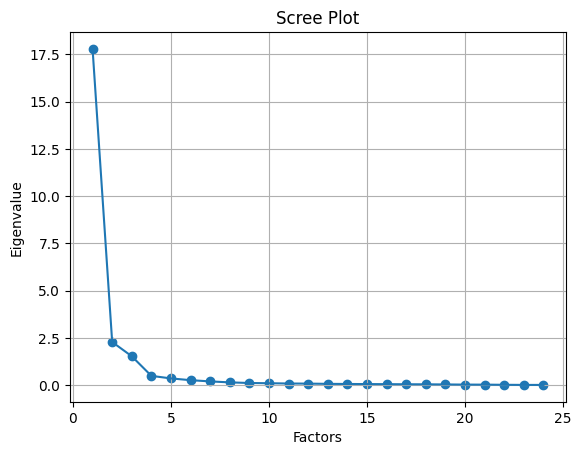

In [ ]:
# 시각화 1
plt.scatter(range(1, data_scale.shape[1]+1),ev)
plt.plot(range(1,data_scale.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

##Step3. Factor Analysis

###Factor : 3


In [ ]:
fa = FactorAnalyzer(n_factors=3, rotation = "promax")
fa.fit(data_scale)

FactorAnalyzer(rotation_kwargs={})

In [ ]:

# Factor Analysis가 적용된 dataset (scaled)
X_f = fa.fit_transform(data_scale)
X_ff = pd.DataFrame(X_f[:,:4], 
                    columns = ['Factor1','Factor2','Factor3'], 
                    index = data_scale.index)
X_ff


,Factor1,Factor2,Factor3
기준일ID,,,
20220101,1.834842,-0.145324,1.703222
20220102,2.211796,0.670892,1.140716
20220103,0.776930,1.113132,1.077576
20220104,0.042924,0.436001,0.887135
20220105,0.087429,1.034574,0.489447
...,...,...,...
20221227,0.632985,0.994589,0.845068
20221228,1.044000,1.446447,0.931895
20221229,0.849711,0.576031,1.126391


<Axes: ylabel='시간대구분'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.ca

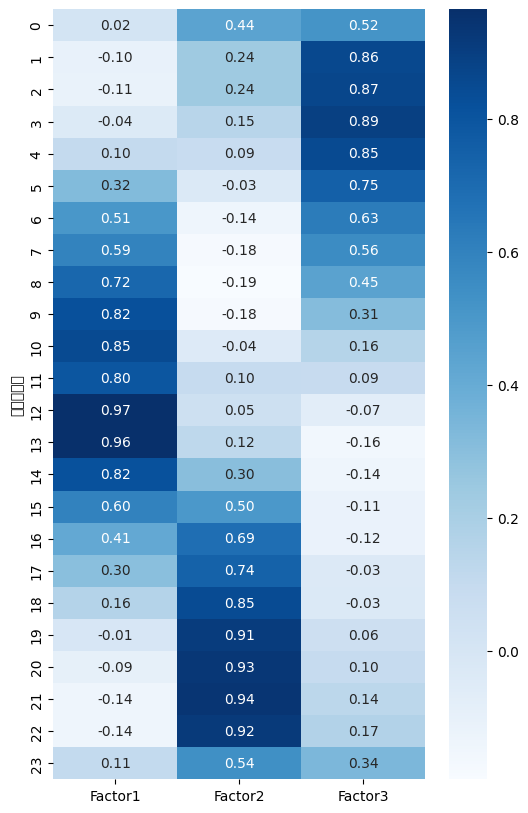

In [ ]:
# 시각화 1)
fa_result_loading = pd.DataFrame(fa.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3'],
                                 index=data_scale.columns)
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading, cmap="Blues", annot=True, fmt='.2f')

<Axes: ylabel='시간대구분'>

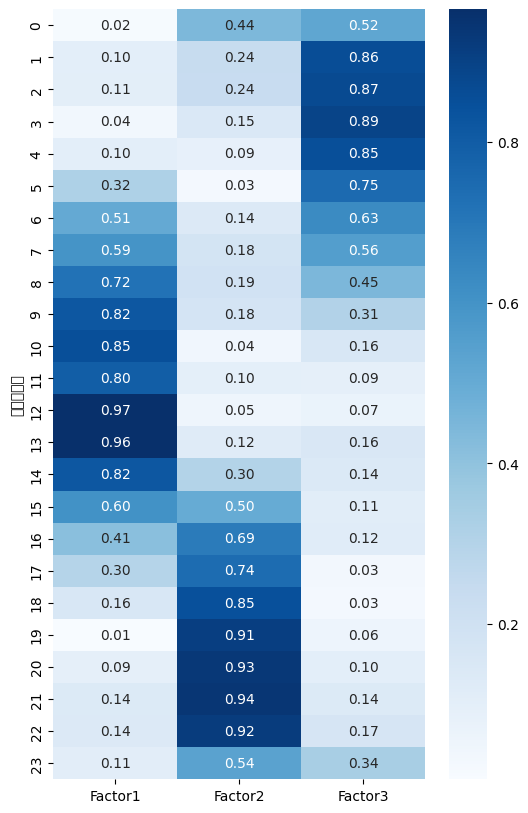

In [ ]:
# 시각화 2) 절대값
plt.figure(figsize=(6,10))
sns.heatmap(np.abs(fa_result_loading), cmap="Blues", annot=True, fmt='.2f')

In [ ]:
fa.get_factor_variance() # 각 factor의 variance
fa_result_fromLoading = pd.DataFrame(fa.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3'])
fa_result_fromLoading.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_result_fromLoading

,Factor1,Factor2,Factor3
SS Loadings,6.533907,6.283254,5.134349
Proportion Var,0.272246,0.261802,0.213931
Cumulative Var,0.272246,0.534048,0.747980


#3. Clustering


In [ ]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(X_ff)
scaled = pd.DataFrame(scaled, columns = X_ff.columns)
scaled.describe() # 기초통계량

,Factor1,Factor2,Factor3
count,3.650000e+02,3.650000e+02,3.650000e+02
mean,-1.946692e-16,1.168015e-16,-3.893385e-17
std,1.001373e+00,1.001373e+00,1.001373e+00
min,-1.706995e+00,-2.843591e+00,-2.306866e+00
25%,-7.958814e-01,-7.318986e-01,-6.652900e-01
50%,-1.773388e-01,-1.466939e-01,-1.697111e-01
75%,5.116416e-01,6.850248e-01,6.022985e-01
max,2.822965e+00,3.986987e+00,5.865329e+00


##Ward's linkage method

### Step 1. 거리 계산에 따른 클러스터링


In [ ]:
data_prime = scaled.copy()

In [ ]:
# used ward's linkeage
# used euclidean distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
clusters = linkage(y=data_prime, method='ward', metric='euclidean')

### Step 2. 군집 수 결정

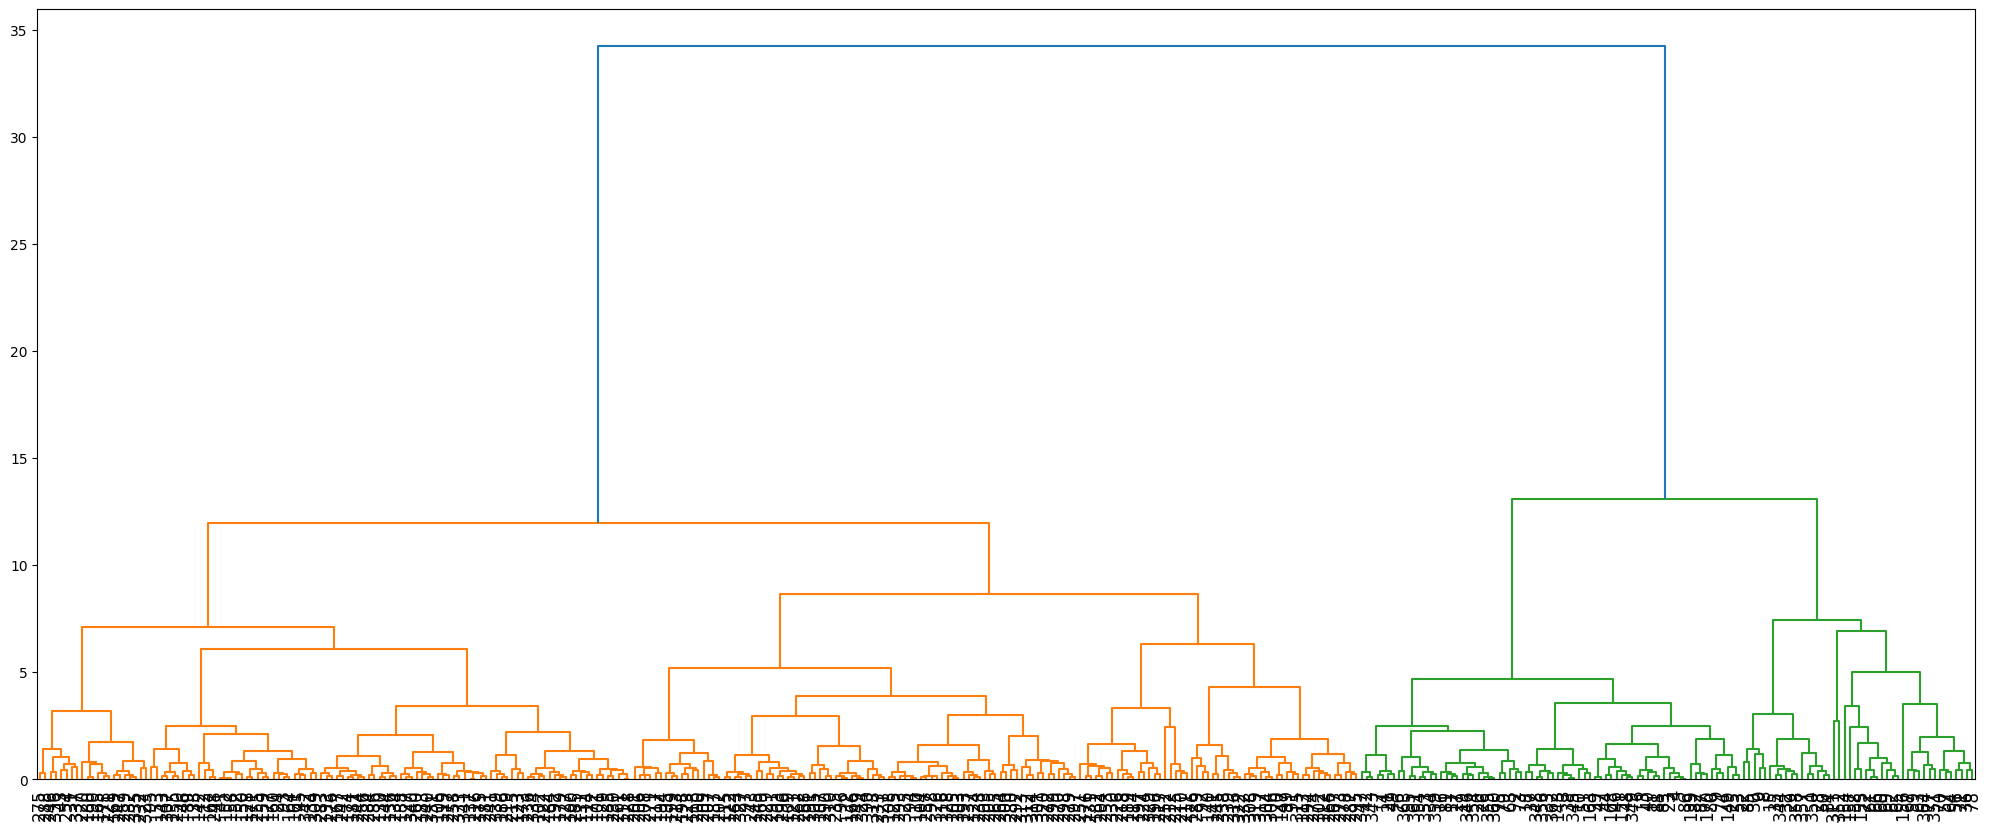

In [ ]:
import matplotlib.pyplot as plt
plt.figure( figsize = (25, 10) )
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
plt.show()

In [ ]:
cut_tree = fcluster(clusters, t=12, criterion='distance')
cut_tree

array([3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       3, 2, 1, 2, 2, 2, 3, 3, 3, 1, 3, 2, 2, 3, 3, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
pd.Series(cut_tree).value_counts()

1    249
2     72
3     44
dtype: int64

### Step 3. Evaluation

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(data_prime, cut_tree)
print('Silhouette Score:', score_samples[:5], '\nSilhouette Score shape:', score_samples.shape, '\n')

average_score = silhouette_score(data_prime, cut_tree)
# np.mean(score_samples) == average_score: True
print('Silhouette Average Score:{0:.3f}'.format(average_score))

Silhouette Score: [0.09795748 0.17254084 0.53707013 0.50026242 0.61495858] 
Silhouette Score shape: (365,) 

Silhouette Average Score:0.373


In [ ]:
fa_result_loading.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='시간대구분')

In [ ]:
data_prime['hc_cluster'] = cut_tree
data_prime['silhouette_coeff'] = score_samples
data_prime['date'] = X_ff.index
data_prime

,Factor1,Factor2,Factor3,hc_cluster,silhouette_coeff,date
0,1.850054,-0.146694,1.714743,3,0.097957,20220101
1,2.230133,0.677215,1.148432,3,0.172541,20220102
2,0.783371,1.123623,1.084865,2,0.537070,20220103
3,0.043280,0.440111,0.893135,2,0.500262,20220104
4,0.088154,1.044325,0.492757,2,0.614959,20220105
...,...,...,...,...,...,...
360,0.638233,1.003963,0.850784,2,0.647806,20221227
361,1.052655,1.460079,0.938199,2,0.434426,20221228
362,0.856756,0.581460,1.134011,2,0.490835,20221229
363,1.032852,1.866792,0.880251,2,0.347356,20221230


In [ ]:
# 군집별 평균 silhouette_score 값
print(data_prime.groupby('hc_cluster')['silhouette_coeff'].mean())
print('표준편차:', data_prime.groupby('hc_cluster')['silhouette_coeff'].mean().std())

hc_cluster
1    0.369277
2    0.514784
3    0.159141
Name: silhouette_coeff, dtype: float64
표준편차: 0.1787976981525915


In [ ]:
cluster_g = data_prime.groupby('hc_cluster')

In [ ]:
# 군집별 통계(평균)
cluster_g.mean()

,Factor1,Factor2,Factor3,silhouette_coeff,date
hc_cluster,,,,,
1,-0.474958,-0.511989,-0.511524,0.369277,2.022077e+07
2,0.535828,0.969630,0.650203,0.514784,2.022045e+07
3,1.811019,1.310728,1.830790,0.159141,2.022045e+07


In [ ]:
# 군집별 통계(표준편차)
cluster_g.std()

,Factor1,Factor2,Factor3,silhouette_coeff,date
hc_cluster,,,,,
1,0.650397,0.638750,0.558809,0.259681,258.345664
2,0.481379,0.430710,0.348631,0.118748,419.398831
3,0.723138,0.989333,0.913185,0.183743,382.326064


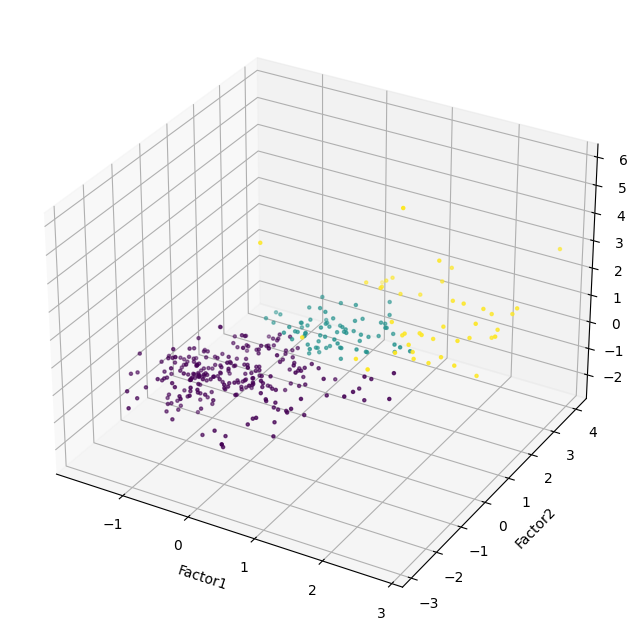

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_prime['Factor1'], data_prime['Factor2'], data_prime['Factor3'], s=5, c = data_prime['hc_cluster'])
ax.set_xlabel('Factor1', rotation=150)
ax.set_ylabel('Factor2')
ax.set_zlabel('Factor3', rotation=60)
plt.show()

In [ ]:
cluster1 = data_prime[data_prime['hc_cluster'] == 1]
cluster2 = data_prime[data_prime['hc_cluster'] == 2]
cluster3 = data_prime[data_prime['hc_cluster'] == 3]

In [ ]:
cluster1

,Factor1,Factor2,Factor3,hc_cluster,silhouette_coeff,date
12,-0.195299,-0.051925,0.429531,1,-0.019783,20220113
24,-0.216265,0.208924,0.191252,1,-0.056896,20220125
31,1.759906,-0.107705,-0.056428,1,-0.238130,20220201
41,-0.264725,0.583182,0.129640,1,-0.237753,20220211
43,1.707144,0.213280,0.576779,1,-0.433206,20220213
...,...,...,...,...,...,...
338,0.169936,-0.614150,0.034789,1,0.297281,20221205
339,0.073814,0.185734,-1.214750,1,0.315027,20221206
340,-0.237555,-0.580881,-0.438929,1,0.521605,20221207
341,-0.240117,-0.944066,-0.676806,1,0.559780,20221208


In [ ]:
cluster2

,Factor1,Factor2,Factor3,hc_cluster,silhouette_coeff,date
2,0.783371,1.123623,1.084865,2,0.537070,20220103
3,0.043280,0.440111,0.893135,2,0.500262,20220104
4,0.088154,1.044325,0.492757,2,0.614959,20220105
5,-0.000506,1.010636,0.559318,2,0.596632,20220106
6,0.360968,0.842341,0.482439,2,0.648332,20220107
...,...,...,...,...,...,...
359,1.195266,1.576201,0.529735,2,0.434189,20221226
360,0.638233,1.003963,0.850784,2,0.647806,20221227
361,1.052655,1.460079,0.938199,2,0.434426,20221228
362,0.856756,0.581460,1.134011,2,0.490835,20221229


In [ ]:
cluster3

,Factor1,Factor2,Factor3,hc_cluster,silhouette_coeff,date
0,1.850054,-0.146694,1.714743,3,0.097957,20220101
1,2.230133,0.677215,1.148432,3,0.172541,20220102
8,1.865795,0.359983,1.597585,3,0.152409,20220109
15,1.485588,0.714320,1.865796,3,0.119126,20220116
22,1.328528,-0.289512,1.236857,3,-0.203363,20220123
28,2.082908,0.580226,0.909447,3,0.021337,20220129
29,1.695800,0.662764,1.634024,3,0.141940,20220130
30,1.727807,-0.897947,1.650346,3,-0.012060,20220131
32,1.613537,0.796392,1.405948,3,0.015326,20220202
35,2.013552,0.952278,1.431634,3,0.231376,20220205


###Step4. Visualization

####전체 기간 데이터 전체 Gruop

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

data_22_gr.set_index('기준일ID', inplace=True)
data_22_gr

,시간대구분,여자60세부터64세생활인구수,여자65세부터69세생활인구수,남자60세부터64세생활인구수,남자65세부터69세생활인구수,남자70세이상생활인구수,여자70세이상생활인구수,60세이상생활인구수
기준일ID,,,,,,,,
20220101,0,1377.2938,1137.8150,1132.2391,889.9959,2030.9870,3267.7697,9836.1005
20220101,1,1373.6920,1120.3144,1163.9959,900.7981,2047.6025,3247.5000,9853.9029
20220101,2,1379.0965,1126.1792,1146.9568,877.4855,2000.9957,3245.3006,9776.0143
20220101,3,1373.5944,1135.3401,1153.8694,882.4243,2009.8907,3217.2452,9772.3641
20220101,4,1371.6546,1147.0565,1146.3987,855.2005,2020.1463,3244.8394,9785.2960
...,...,...,...,...,...,...,...,...
20221231,19,1585.1622,1212.5225,1248.8785,1047.3479,2087.5306,3207.9813,10389.4230
20221231,20,1579.8791,1202.0049,1222.7566,1018.9341,2076.0306,3233.6536,10333.2589
20221231,21,1569.3687,1175.0409,1228.3221,1024.1289,2090.2547,3218.0056,10305.1209


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54876 (\N{HANGUL SYLLABLE HWAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

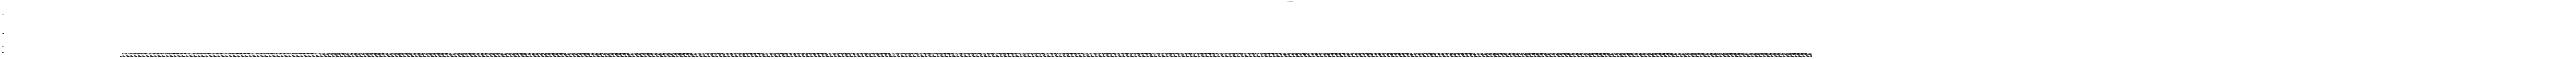

In [ ]:
date_1 = cluster1['date']
clu1 = data_22_gr[data_22_gr.index.isin(date_1)]

date_2 = cluster2['date']
clu2 = data_22_gr[data_22_gr.index.isin(date_2)]

date_3 = cluster3['date']
clu3 = data_22_gr[data_22_gr.index.isin(date_3)]


clu1.index = clu1.index.astype(str) + '-' + clu1['시간대구분'].astype(str)
clu1.index = clu1.index.str[:4] + ':' + clu1.index.str[4:6] + ':' + clu1.index.str[6:8] + ':' + clu1.index.str[9:] + ':00'
clu1.index = pd.to_datetime(clu1.index, format='%Y:%m:%d:%H:%M')
clu1

clu2.index = clu2.index.astype(str) + '-' + clu2['시간대구분'].astype(str)
clu2.index = clu2.index.str[:4] + ':' + clu2.index.str[4:6] + ':' + clu2.index.str[6:8] + ':' + clu2.index.str[9:] + ':00'
clu2.index = pd.to_datetime(clu2.index, format='%Y:%m:%d:%H:%M')


clu3.index = clu3.index.astype(str) + '-' + clu3['시간대구분'].astype(str)
clu3.index = clu3.index.str[:4] + ':' + clu3.index.str[4:6] + ':' + clu3.index.str[6:8] + ':' + clu3.index.str[9:] + ':00'
clu3.index = pd.to_datetime(clu3.index, format='%Y:%m:%d:%H:%M')

plt.figure(figsize=(600, 12))

plt.ylim(2000,4000)
# clu1 데이터 시각화
plt.plot(clu1.index, clu1['60세이상생활인구수'], marker='o', label='Cluster 1')

# clu2 데이터 시각화
plt.plot(clu2.index, clu2['60세이상생활인구수'], marker='s', label='Cluster 2')

# clu3 데이터 시각화
plt.plot(clu3.index, clu3['60세이상생활인구수'], marker='^', label='Cluster 3')




plt.xlabel('시간')
plt.ylabel('60세이상생활인구수')
plt.title('60세이상생활인구수 변화')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ticks = list(clu1.index) + list(clu2.index) + list(clu3.index)
plt.xticks(ticks=ticks)
plt.xticks(rotation=60)

plt.legend()
plt.show()




####전체 기간 데이터 한 Group

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54876 (\N{HANGUL SYLLABLE HWAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

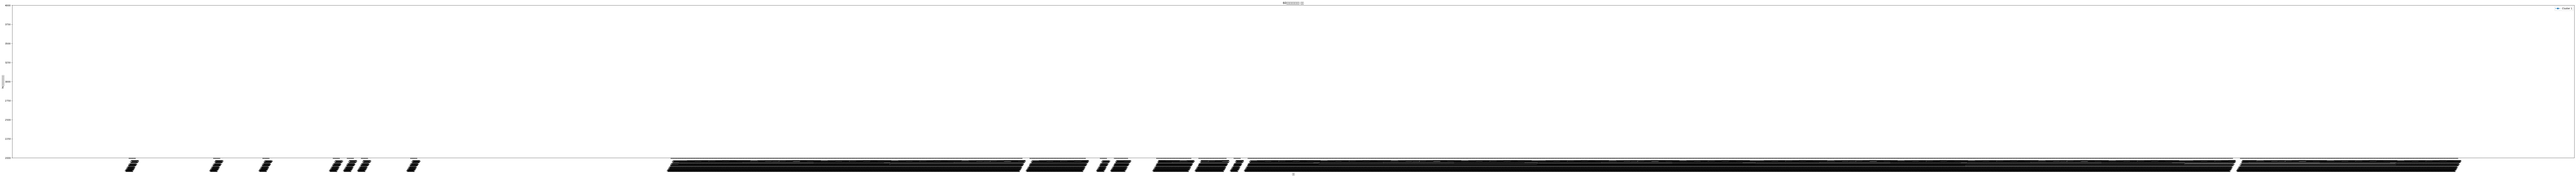

In [ ]:
date_1 = cluster1['date']
clu1 = data_22_gr[data_22_gr.index.isin(date_1)]



clu1.index = clu1.index.astype(str) + '-' + clu1['시간대구분'].astype(str)
clu1.index = clu1.index.str[:4] + ':' + clu1.index.str[4:6] + ':' + clu1.index.str[6:8] + ':' + clu1.index.str[9:] + ':00'
clu1.index = pd.to_datetime(clu1.index, format='%Y:%m:%d:%H:%M')
clu1

plt.figure(figsize=(200, 12))

plt.ylim(2000,4000)
# clu1 데이터 시각화
plt.plot(clu1.index, clu1['60세이상생활인구수'], marker='o', label='Cluster 1')


plt.xlabel('시간')
plt.ylabel('76세이상생활인구수')
plt.title('60세이상생활인구수 변화')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ticks = list(clu1.index)
plt.xticks(ticks=ticks)
plt.xticks(rotation=60)

plt.legend()
plt.show()



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54876 (\N{HANGUL SYLLABLE HWAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

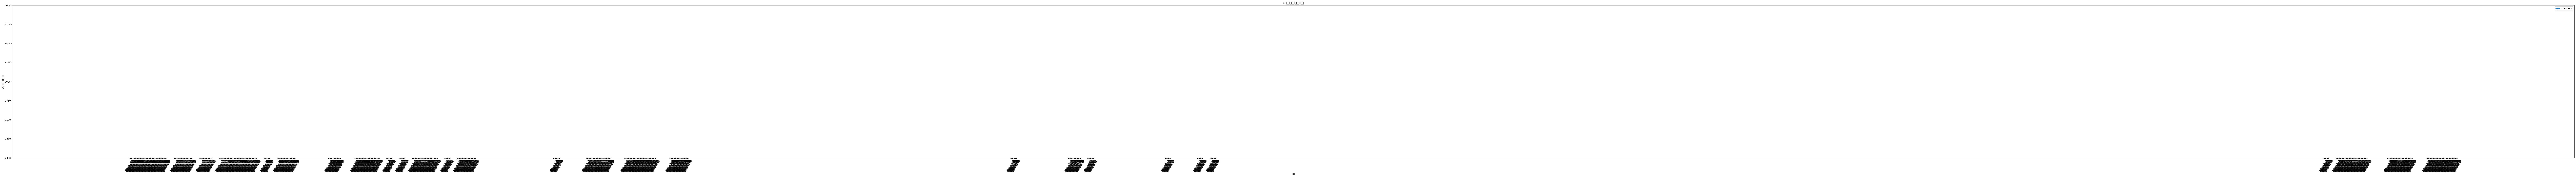

In [ ]:
date_2 = cluster2['date']
clu2 = data_22_gr[data_22_gr.index.isin(date_2)]



clu2.index = clu2.index.astype(str) + '-' + clu2['시간대구분'].astype(str)
clu2.index = clu2.index.str[:4] + ':' + clu2.index.str[4:6] + ':' + clu2.index.str[6:8] + ':' + clu2.index.str[9:] + ':00'
clu2.index = pd.to_datetime(clu2.index, format='%Y:%m:%d:%H:%M')
clu2

plt.figure(figsize=(200, 12))

plt.ylim(2000,4000)
# clu1 데이터 시각화
plt.plot(clu2.index, clu2['60세이상생활인구수'], marker='s', label='Cluster 2')


plt.xlabel('시간')
plt.ylabel('76세이상생활인구수')
plt.title('60세이상생활인구수 변화')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ticks = list(clu2.index)
plt.xticks(ticks=ticks)
plt.xticks(rotation=60)

plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54876 (\N{HANGUL SYLLABLE HWAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

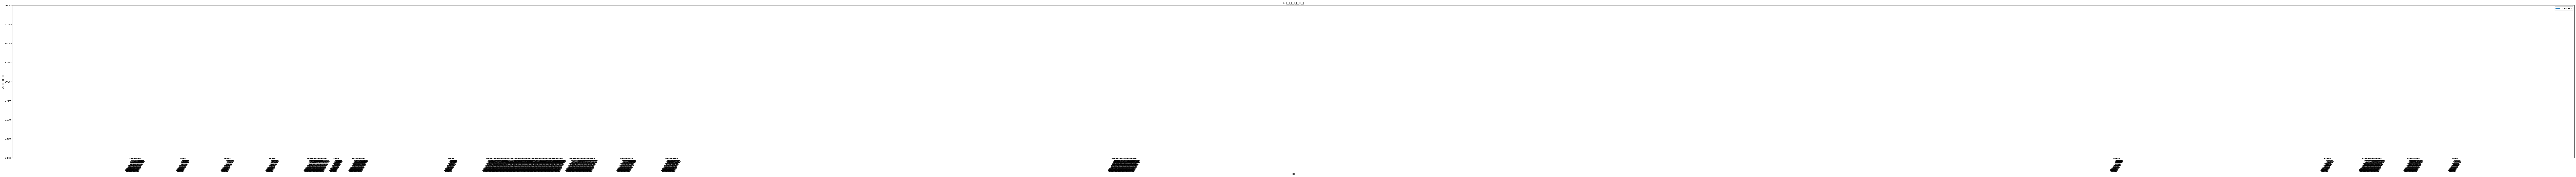

In [ ]:
date_3 = cluster3['date']
clu3 = data_22_gr[data_22_gr.index.isin(date_3)]



clu3.index = clu3.index.astype(str) + '-' + clu3['시간대구분'].astype(str)
clu3.index = clu3.index.str[:4] + ':' + clu3.index.str[4:6] + ':' + clu3.index.str[6:8] + ':' + clu3.index.str[9:] + ':00'
clu3.index = pd.to_datetime(clu3.index, format='%Y:%m:%d:%H:%M')
clu3

plt.figure(figsize=(200, 12))

plt.ylim(2000,4000)
# clu1 데이터 시각화
plt.plot(clu3.index, clu3['60세이상생활인구수'], marker='s', label='Cluster 3')


plt.xlabel('시간')
plt.ylabel('76세이상생활인구수')
plt.title('60세이상생활인구수 변화')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ticks = list(clu3.index)
plt.xticks(ticks=ticks)
plt.xticks(rotation=60)

plt.legend()
plt.show()

#### 특정 Group 특정일 시간별 데이터 (대표적으로 몇 개 Day 뽑고 비교

In [ ]:
cluster1['date']

12     20220113
24     20220125
31     20220201
41     20220211
43     20220213
         ...   
338    20221205
339    20221206
340    20221207
341    20221208
342    20221209
Name: date, Length: 249, dtype: int64

In [ ]:
cluster2['date']

2      20220103
3      20220104
4      20220105
5      20220106
6      20220107
         ...   
359    20221226
360    20221227
361    20221228
362    20221229
363    20221230
Name: date, Length: 72, dtype: int64

In [ ]:
cluster3['date']

0      20220101
1      20220102
8      20220109
15     20220116
22     20220123
28     20220129
29     20220130
30     20220131
32     20220202
35     20220205
36     20220206
50     20220220
56     20220226
57     20220227
58     20220228
59     20220301
60     20220302
61     20220303
62     20220304
63     20220305
64     20220306
65     20220307
66     20220308
67     20220309
69     20220311
70     20220312
71     20220313
72     20220314
77     20220319
78     20220320
84     20220326
85     20220327
154    20220604
155    20220605
156    20220606
157    20220607
311    20221108
344    20221211
350    20221217
351    20221218
352    20221219
357    20221224
358    20221225
364    20221231
Name: date, dtype: int64

In [ ]:
pivot_22_gr2 =data_22_gr_.pivot(index='시간대구분', columns='기준일ID', values='60세이상생활인구수')

#Cluster1
date1 = pd.DataFrame(pivot_22_gr2[20220113]).reset_index(drop = True)
date2 = pd.DataFrame(pivot_22_gr2[20220125]).reset_index(drop = True)
#Cluster2
date3 = pd.DataFrame(pivot_22_gr2[20220103]).reset_index(drop = True)
date4 = pd.DataFrame(pivot_22_gr2[20220104]).reset_index(drop = True)
#Cluster3
date5 = pd.DataFrame(pivot_22_gr2[20220101]).reset_index(drop = True)
date6 = pd.DataFrame(pivot_22_gr2[20220102]).reset_index(drop = True)


date1.columns = ['0113']
date2.columns = ['0125']
date3.columns = ['0103']
date4.columns = ['0104']
date5.columns = ['0101']
date6.columns = ['0102']

In [ ]:
df = pd.concat([date1,date2,date3,date4,date5,date6],axis = 1)
df.index = pivot_22_gr2.index

In [ ]:
df

,0113,0125,0103,0104,0101,0102
시간대구분,,,,,,
0,9638.3412,9633.8578,9884.1958,9771.3992,9836.1005,9723.9198
1,9579.9535,9596.0295,9879.9528,9849.7350,9853.9029,9817.6070
2,9553.9988,9616.3388,9832.4616,9807.9098,9776.0143,9772.7739
3,9544.4826,9495.3755,9829.0986,9721.0977,9772.3641,9717.0207
4,9545.0151,9448.7553,9732.3961,9593.0121,9785.2960,9709.8148
5,9413.7842,9409.4168,9605.2999,9472.4063,9767.6555,9670.9383
6,9139.1336,9071.7143,9376.0242,9198.7255,9771.3797,9603.9395
7,8955.0857,8899.1457,9120.6724,8941.2202,9648.9758,9612.5466
8,8816.3824,8719.0880,8970.6096,8817.2708,9489.6514,9437.6318


<ipython-input-427-1cf1e309ca11>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.index, rotation=90)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54876 (\N{HANGUL SYLLABLE HWAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: Use

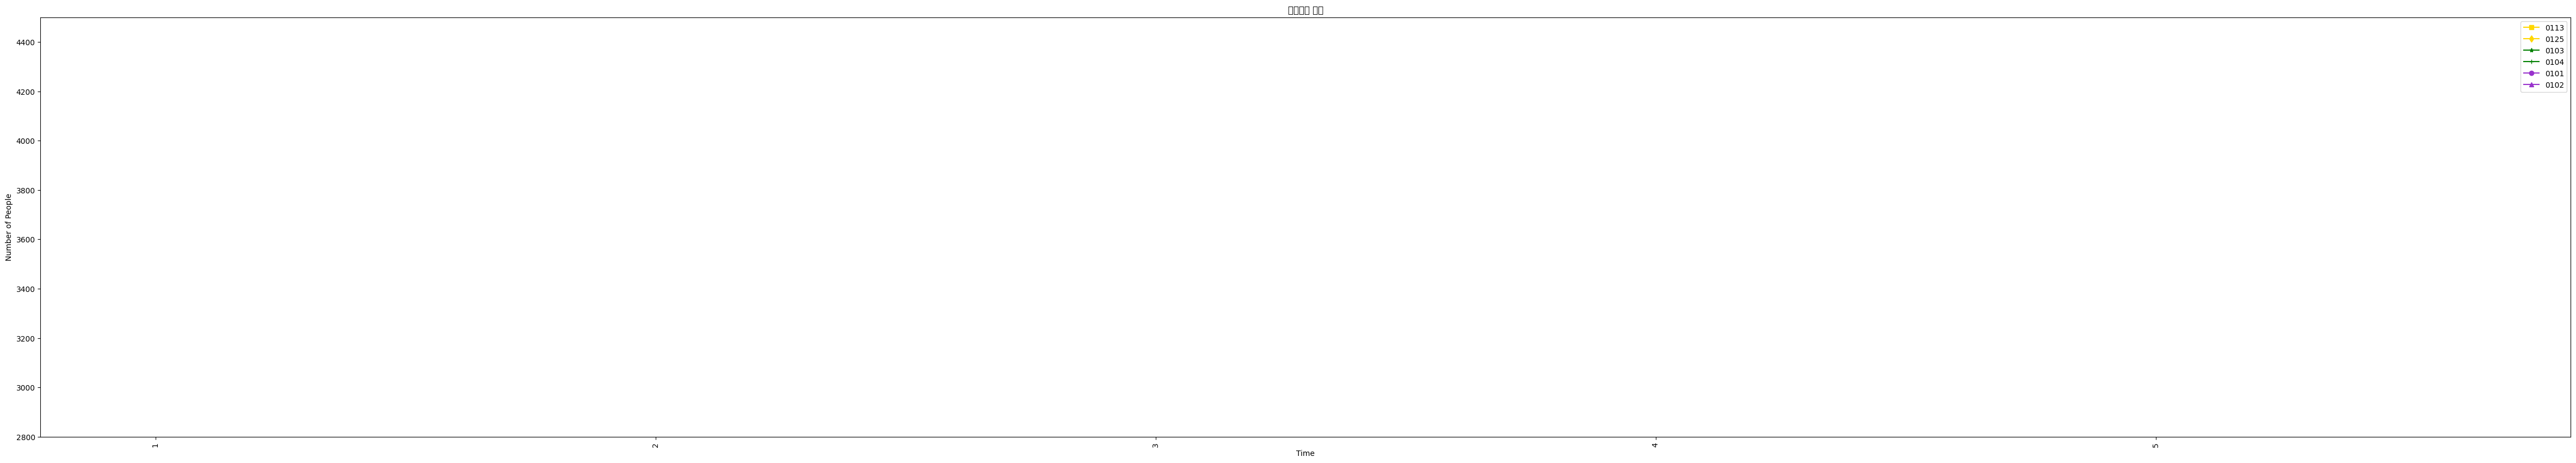

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(60, 10))

df_col = ['0113', '0125', '0103', '0104', '0101', '0102']
markers = ['s', 'd', '*', '+', 'o', '^']
colors = ['gold', 'gold', 'green', 'green', 'darkorchid', 'darkorchid']

# Plot the data on the single subplot
for i in range(len(df_col)):
    ax.plot(df.index, df[df_col[i]], marker=markers[i], color=colors[i], label=df_col[i])

ax.set_title('생활인구 변화')
ax.set_xlabel('Time')
ax.set_ylabel('Number of People')
ax.set_ylim(2800, 4500)
ax.set_xticklabels(df.index, rotation=90)
ax.legend()

# Display the figure
plt.show()


In [ ]:
##시간대
date_3 = cluster3['date']

clu3_date = pivot_22_gr2[pivot_22_gr2.iloc[:, 0:].isin(pivot_22_gr2[date_3])]
clu3_date = clu3_date.dropna(axis=1) 
max_values3 = clu3_date.max()
max_indices3 = clu3_date.idxmax()
result = pd.DataFrame({'생활인구 최댓값': max_values3, '시간': max_indices3})
Clu3_mean = result['시간'].mean()
Clu3_mean

19.954545454545453

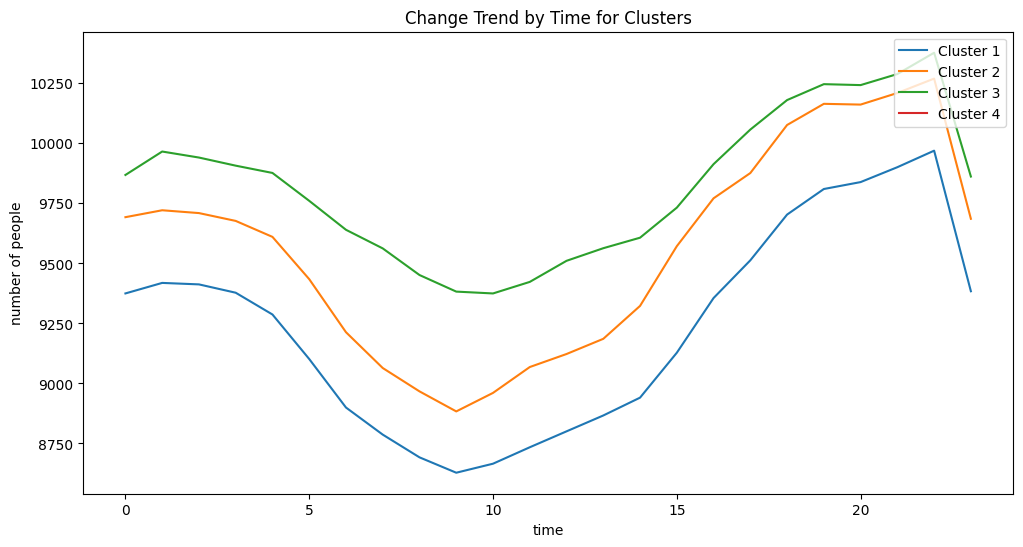

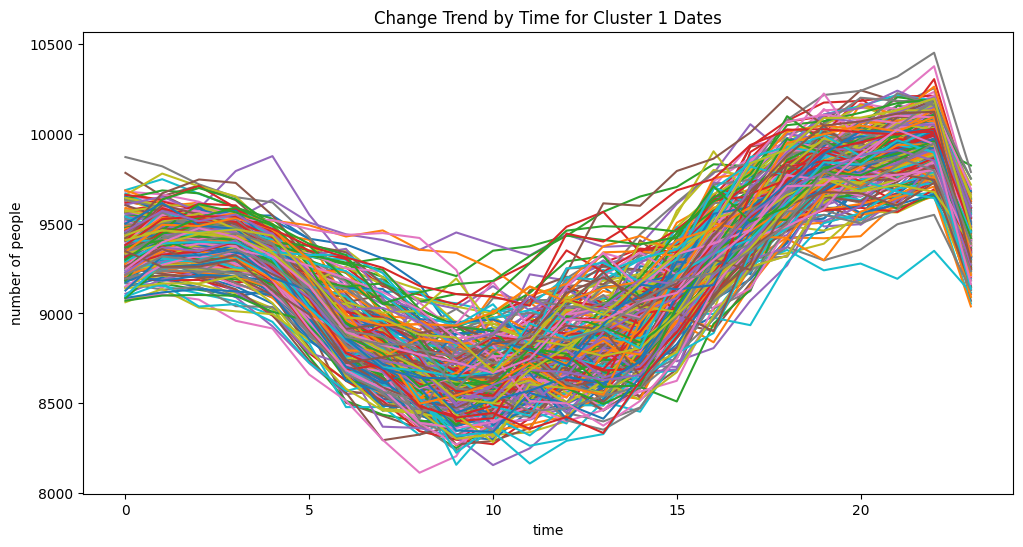

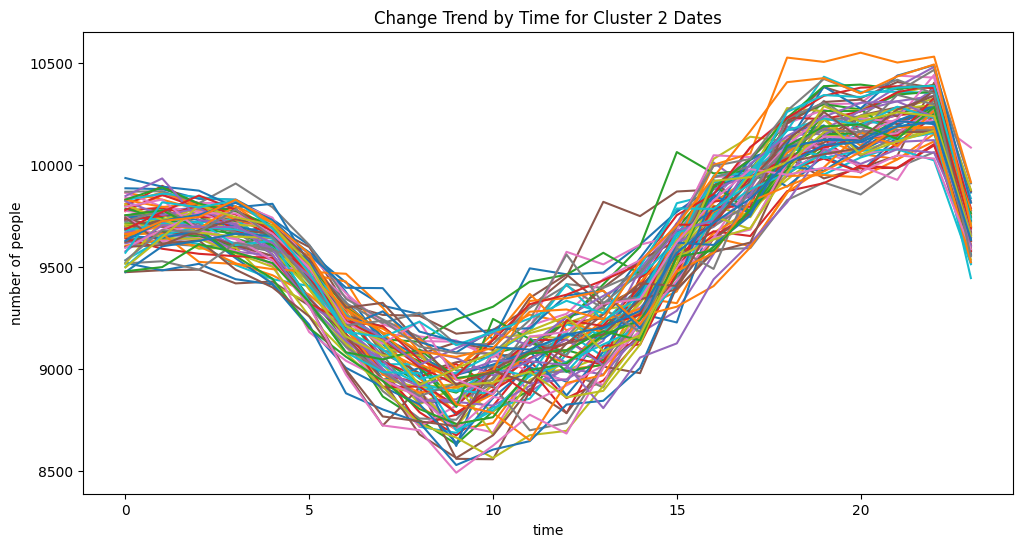

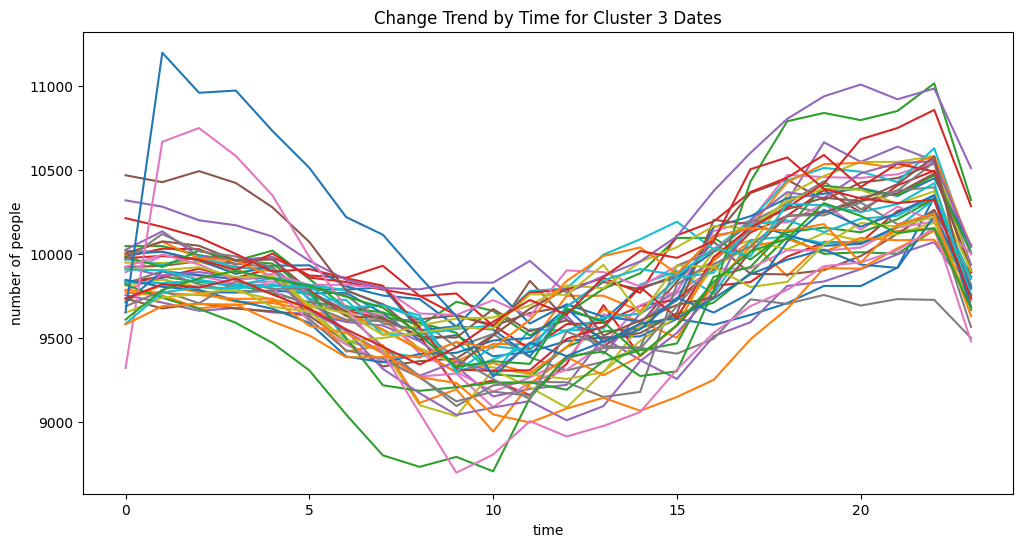

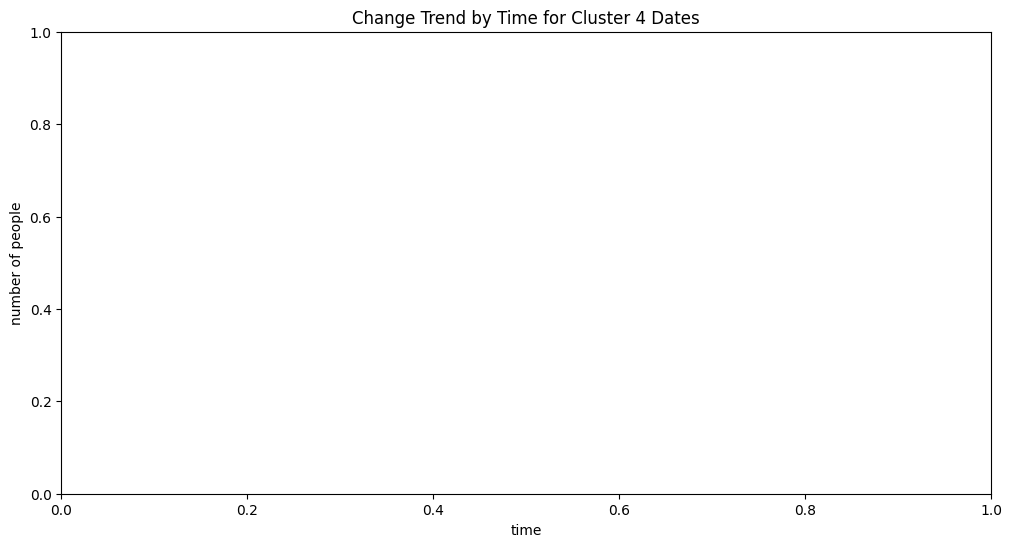

,date
0,20220101
1,20220102
8,20220109
15,20220116
22,20220123
28,20220129
29,20220130
30,20220131
32,20220202
35,20220205


In [ ]:
# 시각화

data_22_gr['date'] = data_22_gr.index

data_22_gr

pivot_22_itw = data_22_gr.pivot(index='date', columns='시간대구분', values='60세이상생활인구수')

pivot_22_itw

## cluster1~5

cluster1

import matplotlib.pyplot as plt

time_range = range(24)

#cluster1부터 5까지의 데이터와 날짜들 추출
clusters = [cluster1, cluster2, cluster3, cluster4]
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
cluster_dates = [cluster['date'] for cluster in clusters]
cluster_data = [pivot_22_gr.loc[dates] for dates in cluster_dates]

#그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

for label, data in zip(cluster_labels, cluster_data):
  change_trend = data.mean()
  ax.plot(time_range, change_trend, label=label)

ax.set_xlabel('time')
ax.set_ylabel('number of people')
ax.set_title('Change Trend by Time for Clusters')
ax.legend(loc='upper right')
plt.show()

import matplotlib.pyplot as plt

# cluster1에 해당하는 날짜들 추출
cluster1_dates = cluster1['date']

# pivot_22_itw에서 cluster1에 해당하는 날짜들의 데이터 추출
cluster1_data = pivot_22_gr.loc[cluster1_dates]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

for date, data in cluster1_data.iterrows():
    change_trend = data.values
    ax.plot(time_range, change_trend, label=date)

ax.set_xlabel('time')
ax.set_ylabel('number of people')
ax.set_title('Change Trend by Time for Cluster 1 Dates')
plt.show()

import matplotlib.pyplot as plt

# cluster2에 해당하는 날짜들 추출
cluster2_dates = cluster2['date']

# pivot_22_itw에서 cluster3에 해당하는 날짜들의 데이터 추출
cluster2_data = pivot_22_gr.loc[cluster2_dates]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

for date, data in cluster2_data.iterrows():
    change_trend = data.values
    ax.plot(time_range, change_trend, label=date)

ax.set_xlabel('time')
ax.set_ylabel('number of people')
ax.set_title('Change Trend by Time for Cluster 2 Dates')
plt.show()

import matplotlib.pyplot as plt

# cluster3에 해당하는 날짜들 추출
cluster3_dates = cluster3['date']

# pivot_22_itw에서 cluster3에 해당하는 날짜들의 데이터 추출
cluster3_data = pivot_22_gr.loc[cluster3_dates]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

for date, data in cluster3_data.iterrows():
    change_trend = data.values
    ax.plot(time_range, change_trend, label=date)

ax.set_xlabel('time')
ax.set_ylabel('number of people')
ax.set_title('Change Trend by Time for Cluster 3 Dates')
plt.show()

import matplotlib.pyplot as plt

# cluster4에 해당하는 날짜들 추출
cluster4_dates = cluster4['date']

# pivot_22_itw에서 cluster4에 해당하는 날짜들의 데이터 추출
cluster4_data = pivot_22_gr.loc[cluster4_dates]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

for date, data in cluster4_data.iterrows():
    change_trend = data.values
    ax.plot(time_range, change_trend, label=date)

ax.set_xlabel('time')
ax.set_ylabel('number of people')
ax.set_title('Change Trend by Time for Cluster 4 Dates')
plt.show()

import matplotlib.pyplot as plt


pd.DataFrame(cluster1['date']) #일요일, 명절, 공휴일 등

pd.DataFrame(cluster3['date'])

In [ ]:
##시간대
pivot_22_gr2 = data_22_gr_.pivot(index='시간대구분', columns='기준일ID', values='60세이상생활인구수')
date_1 = cluster1['date']

clu1_date = pivot_22_gr2[pivot_22_gr2.iloc[:, 0:].isin(pivot_22_gr2[date_1])]
clu1_date = clu1_date.dropna(axis=1) 
max_values2 = clu1_date.max()
max_indices2= clu1_date.idxmax()
result = pd.DataFrame({'생황인구 최댓값': max_values2, '시간': max_indices2})
Clu1_mean = result['시간'].mean()
Clu1_mean

21.51004016064257